In [3]:
# import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# bringing in the dataset
groc_rest_data_path = "Resources/StoresRestaurantData.csv"

groc_rest_df = pd.read_csv(groc_rest_data_path)

# cleaning grocery store df
del groc_rest_df['Unnamed: 0']

In [5]:
groc_rest_df

,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants
0,AL,Autauga,6,1,29,2,30,34
1,AL,Baldwin,24,6,119,21,112,202
2,AL,Barbour,5,0,14,2,21,12
3,AL,Bibb,6,1,19,0,7,6
4,AL,Blount,6,1,31,2,24,19
...,...,...,...,...,...,...,...,...
3138,WY,Sweetwater,5,1,28,2,27,31
3139,WY,Teton,6,0,12,4,25,55
3140,WY,Uinta,3,1,15,3,15,23
3141,WY,Washakie,3,0,5,0,8,14


In [6]:
mo_df = groc_rest_df[groc_rest_df["State"] == "MO"]
counties_df = mo_df[(mo_df["County"] == "St. Louis City") \
                    | (mo_df["County"] == "St. Louis County") \
                    | (mo_df["County"] == "St. Charles") \
                    | (mo_df["County"] == "Jefferson") \
                    | (mo_df["County"] == "Platte") \
                    | (mo_df["County"] == "Jackson") \
                    | (mo_df["County"] == "Clay") \
                    | (mo_df["County"] == "Cass")]
counties_df

,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants
1501,MO,Cass,13,2,42,4,51,60
1506,MO,Clay,32,4,55,11,155,142
1530,MO,Jackson,98,11,235,42,502,457
1532,MO,Jefferson,26,2,88,7,118,95
1565,MO,Platte,12,1,21,6,66,71
1574,MO,St. Charles,40,4,103,25,250,252
1578,MO,St. Louis County,182,8,334,77,815,718
1597,MO,St. Louis City,115,0,125,27,296,345


In [7]:
counties_df["TotalSupermarket"] = counties_df[["GroceryStores", "SupercentersClubStores", "SpecializedFoodStores"]].sum(axis=1)
counties_df

<ipython-input-7-632e618541c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_df["TotalSupermarket"] = counties_df[["GroceryStores", "SupercentersClubStores", "SpecializedFoodStores"]].sum(axis=1)


,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants,TotalSupermarket
1501,MO,Cass,13,2,42,4,51,60,19
1506,MO,Clay,32,4,55,11,155,142,47
1530,MO,Jackson,98,11,235,42,502,457,151
1532,MO,Jefferson,26,2,88,7,118,95,35
1565,MO,Platte,12,1,21,6,66,71,19
1574,MO,St. Charles,40,4,103,25,250,252,69
1578,MO,St. Louis County,182,8,334,77,815,718,267
1597,MO,St. Louis City,115,0,125,27,296,345,142


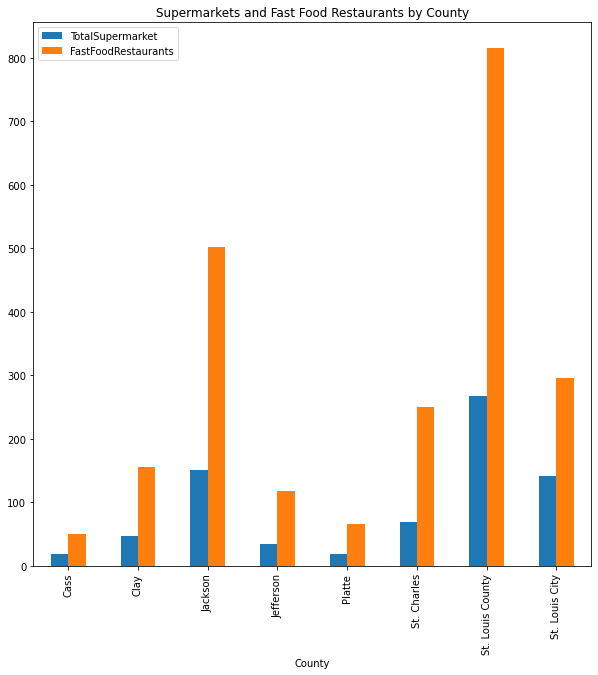

In [8]:
bar_df = counties_df[["County","TotalSupermarket","FastFoodRestaurants"]]
bar_df = bar_df.set_index("County")
ax = bar_df.plot(kind="bar", rot="vertical", figsize=(10,10))
plt.title("Supermarkets and Fast Food Restaurants by County")
plt.savefig("output_data/GrocFFbyCounty.png")

plt.show()

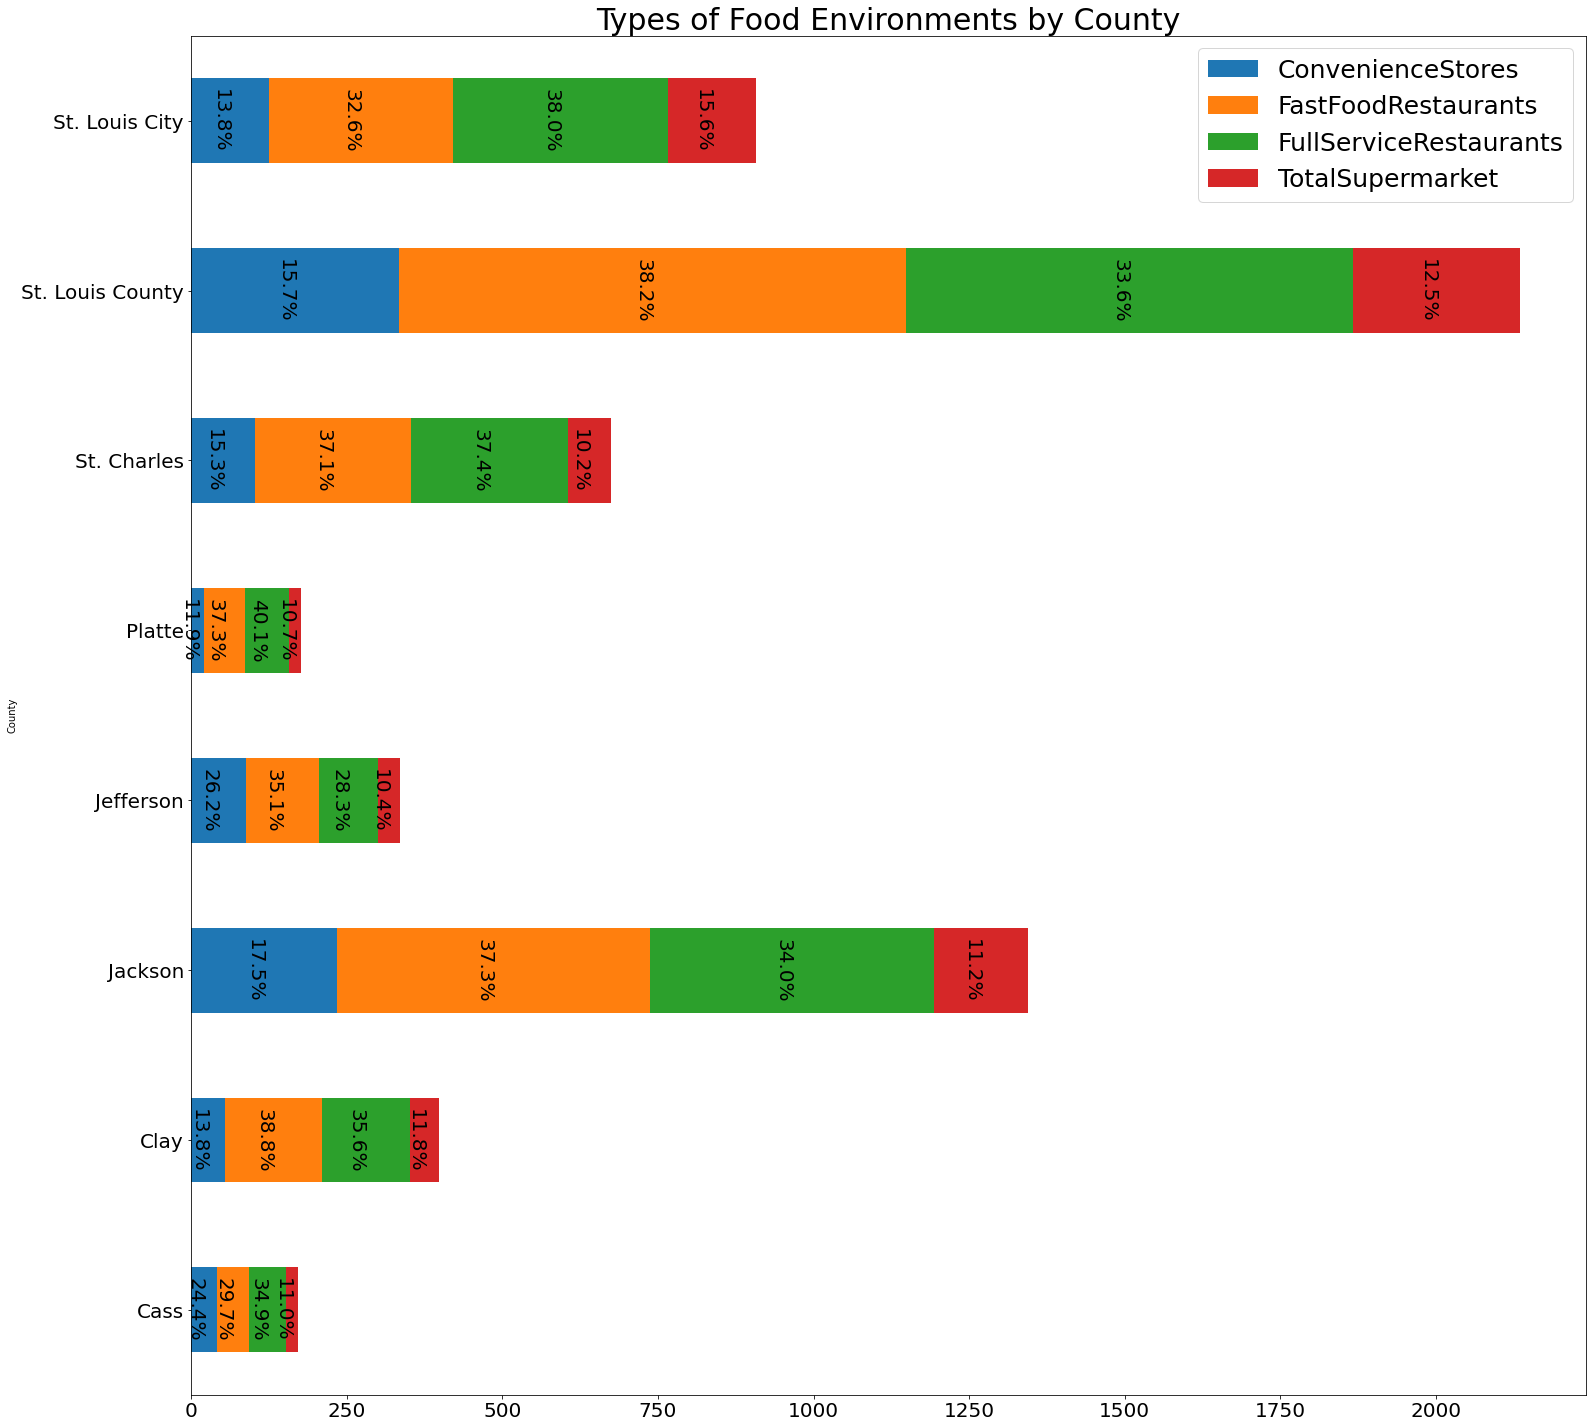

In [74]:
#set the index of counties_df to County
index_counties_df = counties_df.set_index("County")
#since TotalSupermarket is the sum of 3 columns drop the 3 columns that make up TotalSupermarket
cleaned_counties_df=index_counties_df.drop(columns=['GroceryStores','SupercentersClubStores','SpecializedFoodStores'])
#plot bar chart
ax = cleaned_counties_df.plot(kind="barh",stacked=True, rot="horizontal", figsize=(25,25))
#create variable that will sum the values of the columns used in the bar chart
counties_total = cleaned_counties_df["ConvenienceStores"] + cleaned_counties_df["FastFoodRestaurants"] + cleaned_counties_df["FullServiceRestaurants"] + cleaned_counties_df["TotalSupermarket"]
#divide counties total by the number of columns used
counties_rel = cleaned_counties_df[cleaned_counties_df.columns[1:]].div(counties_total, 0)*100
#create values for percent texts and place the text inside the bar chart
for n in counties_rel: 
    for i, (cs, ab, pc) in enumerate(zip(cleaned_counties_df.iloc[:, 1:].cumsum(1)[n],  
                                         cleaned_counties_df[n], counties_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'right',rotation=270,fontsize=20)
#resize xticks,yticks, and legend
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=25)

#title plot and display
plt.title("Types of Food Environments by County",fontsize=30)
plt.savefig("output_data/FoodEnvironmentbyCounty.png")

plt.show()